In [1]:
# Installing required packages
!pip install ggplot
!pip install ggpubr
!pip install factoextra
!pip install MLmetrics

     |████████████████████████████████| 2.2 MB 4.9 MB/s eta 0:00:01
     |████████████████████████████████| 9.2 MB 107.1 MB/s eta 0:00:01
     |████████████████████████████████| 233 kB 117.1 MB/s eta 0:00:01
ERROR: Could not find a version that satisfies the requirement ggpubr (from versions: none)
ERROR: No matching distribution found for ggpubr
ERROR: Could not find a version that satisfies the requirement factoextra (from versions: none)
ERROR: No matching distribution found for factoextra


In [2]:
# Loading required packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics
import seaborn as sns

In [25]:
# Reading the data
data = pd.read_csv("./datasets/1/tracks.csv")

In [26]:
# Checking for missing values
data.isnull().sum()

id                   0
name                71
popularity           0
duration_ms          0
explicit             0
artists              0
id_artists           0
release_date         0
danceability         0
energy               0
key                  0
loudness             0
mode                 0
speechiness          0
acousticness         0
instrumentalness     0
liveness             0
valence              0
tempo                0
time_signature       0
dtype: int64

In [27]:
# Summary statistics
data.describe()

,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,586672.000000,5.866720e+05,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000
mean,27.570053,2.300512e+05,0.044086,0.563594,0.542036,5.221603,-10.206067,0.658797,0.104864,0.449863,0.113451,0.213935,0.552292,118.464857,3.873382
std,18.370642,1.265261e+05,0.205286,0.166103,0.251923,3.519423,5.089328,0.474114,0.179893,0.348837,0.266868,0.184326,0.257671,29.764108,0.473162
min,0.000000,3.344000e+03,0.000000,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,13.000000,1.750930e+05,0.000000,0.453000,0.343000,2.000000,-12.891000,0.000000,0.034000,0.096900,0.000000,0.098300,0.346000,95.600000,4.000000
50%,27.000000,2.148930e+05,0.000000,0.577000,0.549000,5.000000,-9.243000,1.000000,0.044300,0.422000,0.000024,0.139000,0.564000,117.384000,4.000000
75%,41.000000,2.638670e+05,0.000000,0.686000,0.748000,8.000000,-6.482000,1.000000,0.076300,0.785000,0.009550,0.278000,0.769000,136.321000,4.000000
max,100.000000,5.621218e+06,1.000000,0.991000,1.000000,11.000000,5.376000,1.000000,0.971000,0.996000,1.000000,1.000000,1.000000,246.381000,5.000000


In [28]:
# Preprocessing
data['release_date'] = data['release_date'].str[:4]
data = data.rename(columns={'release_date': 'release_year'})
data['release_year'] = pd.to_numeric(data['release_year'])
data = data.drop(['id', 'name', 'artists', 'id_artists'], axis=1)
data = data.dropna()

In [29]:
data.head()

,popularity,duration_ms,explicit,release_year,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,6,126903,0,1922,0.645,0.4450,0,-13.338,1,0.4510,0.674,0.7440,0.151,0.127,104.851,3
1,0,98200,0,1922,0.695,0.2630,0,-22.136,1,0.9570,0.797,0.0000,0.148,0.655,102.009,1
2,0,181640,0,1922,0.434,0.1770,1,-21.180,1,0.0512,0.994,0.0218,0.212,0.457,130.418,5
3,0,176907,0,1922,0.321,0.0946,7,-27.961,1,0.0504,0.995,0.9180,0.104,0.397,169.980,3
4,0,163080,0,1922,0.402,0.1580,3,-16.900,0,0.0390,0.989,0.1300,0.311,0.196,103.220,4


In [31]:
k_max = 20
np.random.seed(12)
elbow = []
for k in range(1, k_max+1):
    kmeans = KMeans(n_clusters=k, n_init=5, max_iter=15)
    kmeans.fit(data)
    elbow.append(kmeans.inertia_)

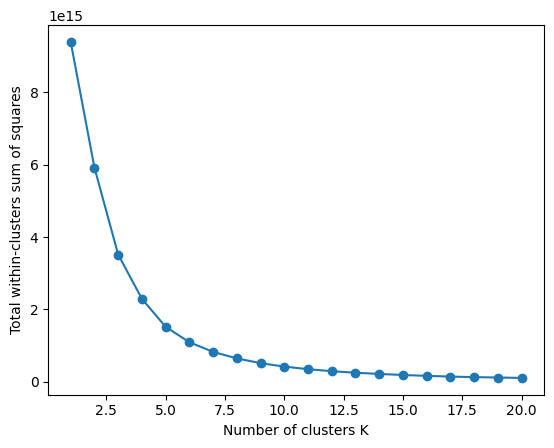

In [32]:
# Plotting the elbow curve
plt.plot(range(1, k_max+1), elbow, marker='o')
plt.xlabel('Number of clusters K')
plt.ylabel('Total within-clusters sum of squares')
plt.show()

In [37]:
# Clustering
kmc = KMeans(n_clusters=16, max_iter=20)
kmc.fit(data)
cluster_centers = pd.DataFrame(kmc.cluster_centers_, columns=data.columns)

/Users/abhisheksharma/miniconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


/Users/abhisheksharma/miniconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


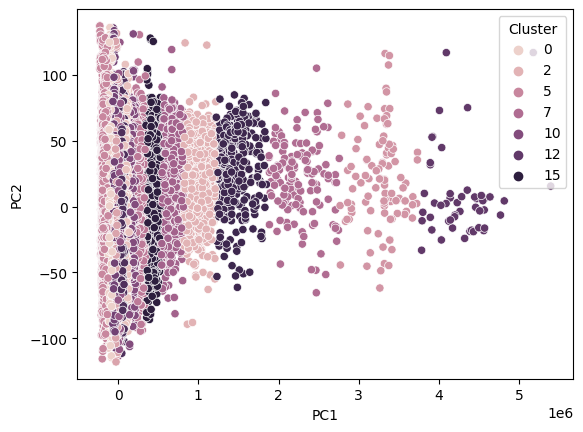

In [38]:
# Visualizing the clusters
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(data)
pca_data = pd.DataFrame(pca.transform(data), columns=['PC1', 'PC2'])
pca_data['Cluster'] = kmc.labels_

sns.scatterplot(x='PC1', y='PC2', hue='Cluster', data=pca_data)
plt.show()